## Observations and Insights

- "Tumor Volume per Drug Regimen"
The sample tend to be close to the mean which indicates the low standard deviation and further expressed by a very low SEM value  indicating the data is close to the mean, hence the data is more representative of the true mean.
- "Drug Regimen Datapoints"
The datapoints between Drug Regimens at the average level is similar to each other except Capomulin and Ramicane. Capomulin and Ramicane have a disctinct similarity to each other.
- "Pie Plots"
The distribution of average tumor volume for both female and male across all drug regimen is almost similar with a range of diference of 0.2% - 2.5%
- "Capomulin Treatmeant of l509"
The Capomulin treatment for the mouse with ID I509, have a very strong correlation between the increase of timepoint vs tumor volume. The higher the timepoint the lesser the tumor volume.



## Dependencies and starter code

In [4]:
%matplotlib notebook
%matplotlib inline

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

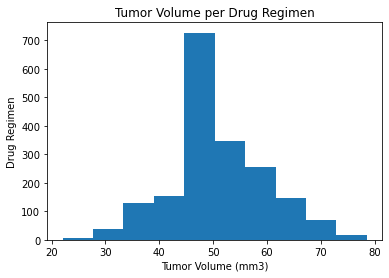

The mean of tumor volume is: 50.45
The median of tumor volume is: 48.95
The standard deviation of tumor volume is: 8.89
The starndard error of tumor volume is: 0.2


In [35]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation,and SEM of the TUMOR VOLUME for each regimen
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(complete_df['Tumor Volume (mm3)'])
plt.title("Tumor Volume per Drug Regimen")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Drug Regimen')
plt.show()

print(f"The mean of tumor volume is: {round(complete_df['Tumor Volume (mm3)'].mean(),2)}")
print(f"The median of tumor volume is: {round(complete_df['Tumor Volume (mm3)'].median(),2)}")
print(f"The standard deviation of tumor volume is: {round(np.std(complete_df['Tumor Volume (mm3)'],ddof = 0),2)}")
print(f"The starndard error of tumor volume is: {round(complete_df['Tumor Volume (mm3)'].sem(),2)}")


## Bar plots

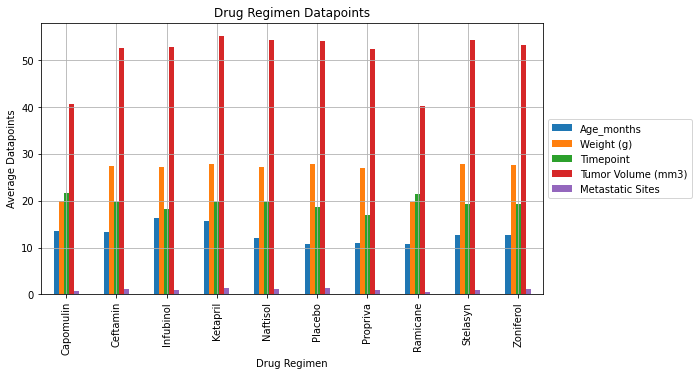

<Figure size 432x288 with 0 Axes>

In [36]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#Group the averagge data for each drug regimen
grouped_df = complete_df.groupby(['Drug Regimen'])
avg_regimen_df = grouped_df.mean()

#Declare the x axis and the tick locations
x_axis = np.arange(len(avg_regimen_df))
tick_locations = [value for value in x_axis]
#Plot and format the bar chart
multi_plot = avg_regimen_df.plot(kind="bar", figsize=(9,5),align="center")
multi_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Provide the title and labels of x and y axis
plt.title("Drug Regimen Datapoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Datapoints")

plt.grid()
plt.show()
plt.tight_layout()

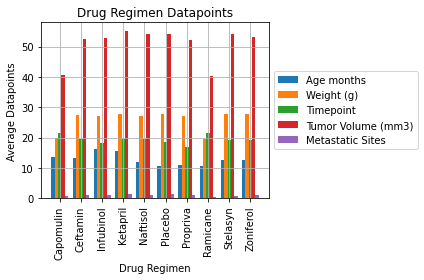

In [2]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#
Age_months=13.5,13.2,16.2,15.7,12,10.7,10.9,10.7,12.8,12.6
Weight=20,27.4,27.2,27.9,27.2,27.9,27,19.7,27.9,27.7
Timepoint=21.6,19.7,18.2,19.7,19.6,18.7,16.9,21.4,19.2,19.4
Tumor_Volume=40.7,52.6,52.9,55.2,54.3,54,52.3,40.2,54.2,53.2
Metastatic_Sites=0.7,1.2,1,1.3,1.2,1.4,1,0.5,0.9,1.2

X = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
Y = [Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites]
Y1 = ["Age months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
subcategorybar(X, Y)
plt.legend(Y1,loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation='vertical')
plt.title("Drug Regimen Datapoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Datapoints")
plt.grid()
plt.tight_layout()
plt.show()

## Pie plots

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook
%matplotlib inline
import pandas as pd
gender_groups = complete_df.groupby(['Sex','Drug Regimen'])
avg_df = gender_groups["Tumor Volume (mm3)"].mean()
avg_df

Sex     Drug Regimen
Female  Capomulin       40.591944
        Ceftamin        52.746823
        Infubinol       53.603511
        Ketapril        53.478945
        Naftisol        54.603113
        Placebo         54.542857
        Propriva        52.831744
        Ramicane        41.452075
        Stelasyn        54.951186
        Zoniferol       53.953839
Male    Capomulin       40.780898
        Ceftamin        52.424661
        Infubinol       52.062168
        Ketapril        56.019393
        Naftisol        54.098033
        Placebo         53.376035
        Propriva        51.889446
        Ramicane        39.623145
        Stelasyn        53.194907
        Zoniferol       51.881546
Name: Tumor Volume (mm3), dtype: float64

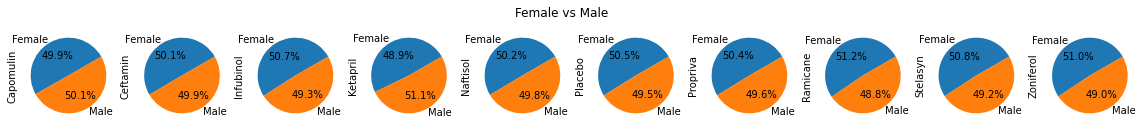

In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.DataFrame({'Capomulin':[40.6,40.8],
                   'Ceftamin':[52.7,52.4],
                   'Infubinol':[53.6,52.1],
                   'Ketapril':[53.5,56.0],
                   'Naftisol':[54.6,54.1],
                   'Placebo':[54.5,53.4],
                   'Propriva':[52.8,51.9],
                   'Ramicane':[41.5,39.6],
                   'Stelasyn':[55.0,53.2],
                   'Zoniferol':[54.0,51.9]})

index=['Female','Male']

plot = df.plot.pie(subplots=True, labels=index,figsize=(20, 2), startangle=30, autopct="%1.1f%%", legend=False, title= 'Female vs Male')


Text(0.5, 0.98, 'Female vs Male')

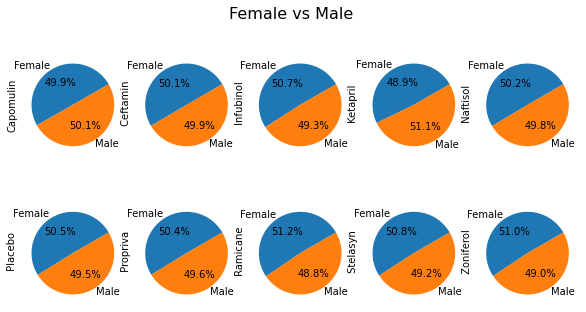

In [8]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
avg_df1 = pd.DataFrame(dict(
        Drug_Regimen='Capomulin; Ceftamin; Infubinol; Ketapril; Naftisol; Placebo; Propriva; Ramicane; Stelasyn; Zoniferol'.split(';'),
        Female=[40.6,52.7,53.6,53.5,54.6,54.5,52.8,41.5,55.0,54.0],
        Male=[40.8,52.4,52.1,56.0,54.1,53.4,51.9,39.6,53.2,51.9]))
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, (idx, row) in enumerate(avg_df1.set_index('Drug_Regimen').iterrows()):
    ax = axes[i // 5, i % 5]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, autopct="%1.1f%%")
    ax.set_ylabel(idx)
fig.subplots_adjust(wspace=.1)
fig.suptitle('Female vs Male', fontsize=16)




## Quartiles, outliers and boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')

##Four of the most promising treatment regimens
grouped_df = complete_df.groupby(['Drug Regimen'])
criteria_df = grouped_df[["Timepoint", "Tumor Volume (mm3)"]].mean()
criteria_df

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,21.565217,40.675741
Ceftamin,19.747191,52.591172
Infubinol,18.174157,52.884795
Ketapril,19.707447,55.235638
Naftisol,19.623656,54.331565
Placebo,18.674033,54.033581
Propriva,16.863354,52.322552
Ramicane,21.425439,40.216745
Stelasyn,19.226519,54.233149


In [13]:
##Calculate the final tumor volume of each mouse across four (Capomulin,Ramicane, Infubinol, and Ceftamin)
cap_df = complete_df.loc[complete_df["Drug Regimen"] == "Capomulin",:]
cap_df1 = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_tumor = pd.DataFrame(cap_df1)
cap_merge = pd.merge(cap_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

cap_final_tumor = cap_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_final_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"Capomulin tumor volume values below {cap_lower_bound} and above {cap_upper_bound}  could be outliers.")

Capomulin tumor volume values below 20.70456164999999 and above 51.83201549  could be outliers.


In [14]:
ram_df = complete_df.loc[complete_df["Drug Regimen"] == "Ramicane",:]
ram_df1 = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_tumor = pd.DataFrame(ram_df1)
ram_merge = pd.merge(ram_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head()

ram_final_tumor = ram_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_final_tumor.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"Ramicane tumor volume values below {ram_lower_bound} and above {ram_upper_bound}  could be outliers.")

Ramicane tumor volume values below 17.912664470000003 and above 54.30681135  could be outliers.


In [15]:
inf_df = complete_df.loc[complete_df["Drug Regimen"] == "Infubinol",:]
inf_df1 = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_tumor = pd.DataFrame(inf_df1)
inf_merge = pd.merge(inf_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head()
inf_final_tumor = inf_merge["Tumor Volume (mm3)"]

inf_quartiles = inf_final_tumor.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(f"Infubinol tumor volume values below {inf_lower_bound} and above {inf_upper_bound}  could be outliers.")

Infubinol tumor volume values below 36.83290494999999 and above 82.74144559000001  could be outliers.


In [16]:
prop_df = complete_df.loc[complete_df["Drug Regimen"] == "Ceftamin",:]
prop_df1 = prop_df.groupby('Mouse ID').max()['Timepoint']
prop_tumor = pd.DataFrame(prop_df1)
prop_merge = pd.merge(prop_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
prop_merge.head()

prop_final_tumor = prop_merge["Tumor Volume (mm3)"]

prop_quartiles = prop_final_tumor.quantile([.25,.5,.75])
prop_lowerq = prop_quartiles[0.25]
prop_upperq = prop_quartiles[0.75]
prop_iqr = prop_upperq-prop_lowerq
prop_lower_bound = prop_lowerq - (1.5*prop_iqr)
prop_upper_bound = prop_upperq + (1.5*prop_iqr)

print(f"Ceftamin tumor volume values below {prop_lower_bound} and above {prop_upper_bound}  could be outliers.")

Ceftamin tumor volume values below 25.355449580000002 and above 87.66645829999999  could be outliers.


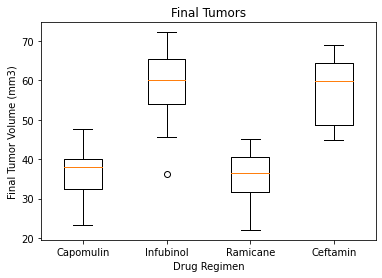

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
box_plot_df = [cap_final_tumor, inf_final_tumor, ram_final_tumor, prop_final_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box_plot_df, labels=["Capomulin","Infubinol","Ramicane", "Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and scatter plots

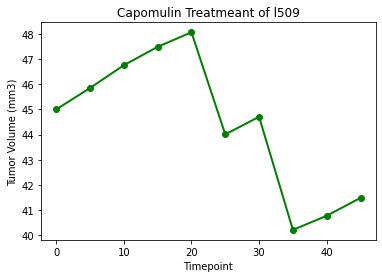

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

##Four of the most promising treatment regimens
grouped_df = complete_df.groupby(['Drug Regimen'])
criteria_df = grouped_df[["Timepoint", "Tumor Volume (mm3)"]].mean()
cap_df = complete_df.loc[complete_df["Drug Regimen"] == "Capomulin",:]

capline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
capline_df.head()

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_time = capline_df["Timepoint"]
cap_tumor= capline_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of l509')
plt.plot(cap_time, cap_tumor,linewidth=2, marker="o", color="green")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

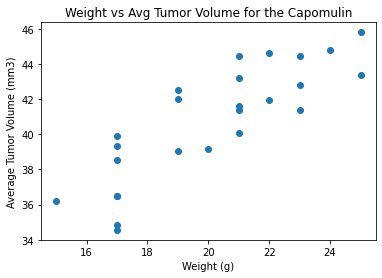

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st


cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Avg Tumor Volume for the Capomulin')
plt.savefig('scatterplot')
plt.show()

In [57]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for 
# the Capomulin regimen
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


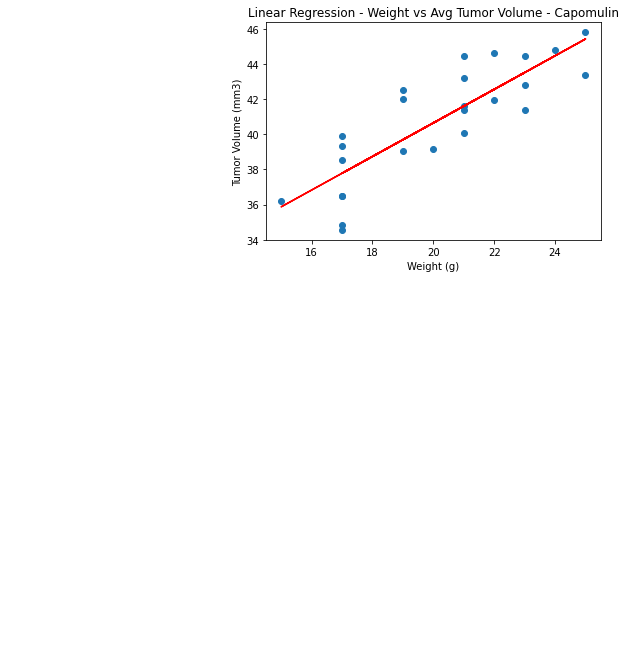

In [63]:
i# Calculate the linear regression model for mouse weight and average tumor volume for 
# the Capomulin regimen
import scipy.stats as st
from scipy.stats import linregress
cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')

x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Linear Regression - Weight vs Avg Tumor Volume - Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()